# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:  

    1. Определить рыночную стоймость объектов недвижимости.
    2. Определить аномалии в данных и провести предобработку данных.
    3. Установить какие факторы влияют на ценообразование стоймости квартир.
**Основные этапы исследования**:

    1. Обзор данных.
    2. Предобработка данных. 
    3. Добавление дополнительной информации необходимой для исследования.
    4. Провести исследовательский анализ данных, чтобы установить основные факторы влияющие на цену квартиры, скорость продажи недвижимости, а так же населенные пункты с экстремальными значениями.
    5. Сделать общий вывод о рынке недвижимости.

### Обзор данных. 

In [1]:
import pandas as pd #импортируем pandas
import matplotlib.pyplot as plt #импортируем matlibplot

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t')# сохраним данные в переменную data

In [3]:
data.head(10)#выведем первые десять строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()#получим информацию общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

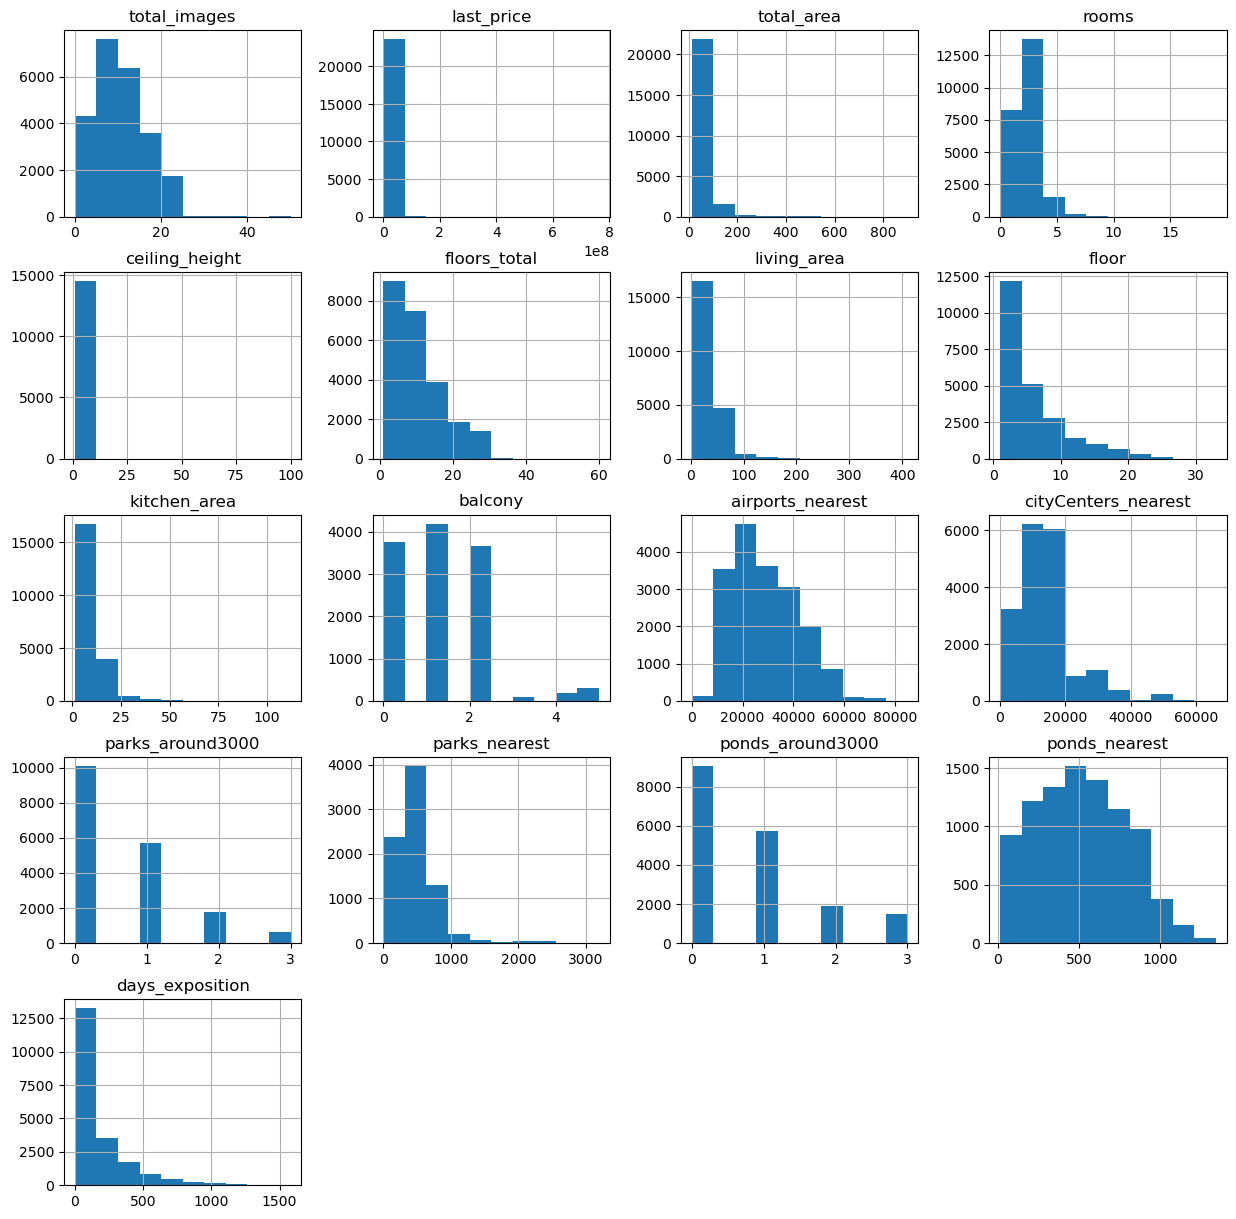

In [5]:
data.hist(figsize = (15,15))
plt.show();#посторим гистограммы для числовых значений

### Предобработка данных

#### Удаление пропусков

In [6]:
data.isna().sum()#найдем количество пропусков в стобцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') #построим процентр пропусков
#в каждом столбце

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#заменим медианным значением высоты потолка пропущенные значения

In [9]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

In [10]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [11]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

In [12]:
data['ceiling_height'].isna().sum()#проверим замену

0

In [13]:
for room in data['rooms'].unique(): # с помощью цикла заменим пропущенные значения жилой площади медианным значением площади с
#соответствующим количеством комнат
    data.loc[(data['rooms'] == room)&(data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

In [14]:
data['living_area'].isna().sum()#проверим замену

0

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)#заменим пропущенные значения о принадлежности к аппартаментам на Fasle

In [16]:
data['is_apartment'].isna().sum()#проверим замену

0

In [17]:
data.loc[(data['studio'] == True)|(data['open_plan'] == True), 'kitchen_area'] = 0 #заменим пропущенные значения площади кухонь в студиях и открытых планировке на 0

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())#в остальных типах квартир заменим на медианное значение

In [19]:
data['kitchen_area'].isna().sum()#проверим замену

0

In [20]:
data['balcony'] = data['balcony'].fillna(0)#заменим отсутсвующие значения о количестве балконов на ноль

In [21]:
data['balcony'].isna().sum()

0

##### Вывод
1. Пропущенные значения в ceiling_height, вероятно, вызваны ошибкой при заполнении данных. Пропущенные значения значения лучше всего заменить медианным значением безотносительно других параметров жилья.  
2. Пропущенные значения в floors_total стоит оставить без изменения, так как нет возможности установить связь этажности с другими предсталенными данными. Пропущенные значения малочислены (86) и вероятно вызваны ошибками при внесении данных. 
3. Пропущенные значения в living_area стоит заменить медианным значением по rooms, так как количество комнат в квартире сильно влияет на жилую площадь, в относительности с другими показанными значениями. Значения пропущенны, вероятно, ввиду субъективной излишности, при наличии данных об общей площади и количестве комнат. 
4. Пропущенным значеним is_apartment лучшим образом подходит замена на Fasle. Аппартаменты не очень широко распространенны на территории СНГ, чем и вызвано отсутвие информации в этом столбце.  
5. Пропущенные значения в kitchen_area вызванны несколькими факторами:  
- отсутвующие значения площади кухни в квартирах типа studio и open_plan вызваны особенностями планировки и в этих категориях их стоит заменить на ноль;
- в классических квартирах площадь кухонь следует заменить на медианное значение без привязки к другим параметрам, так как на площадь кухни слабо влияют представленные данные.  
6. Пропуски в balcony следует заменить на 0, так как отсутвующе значения, вероятно, говорят об отсутвии балконов. Пропуски вызваны субъективной неважностью параметра. 
7. Пропуски в locality_name стоит оставить без измениний, так как невозможно установить местность из известных данных. Пропущенные значения малочисленны (49) и, вероятнее всего, вызваны человеческим фактором.
8. Пропуски в airports_nearest,  parks_around3000, parks_nearest, ponds_around3000, ponds_nearest следует оставить без изменений по причине невозможности восстановления из других данных. Вероятно, информация отсутвует по причине отсутвия таких географических объектов в некоторых населенных пунктах, либо сознательного опущения данных.
9. Пропущенную информацию в days_exposition оставим без изменеий, так как она свидетельствует об отсутвии действий по данному объекту.

#### Изменение типа данных 

In [22]:
data['last_price'] = pd.to_numeric(data['last_price'], errors = 'raise')# изменеим тип данных last_price с object на числовой

In [23]:
data['last_price'] = data['last_price'].astype('Int64')#изменим тип данных на int

In [24]:
data['total_area'] = pd.to_numeric(data['total_area'], errors = 'raise')# изменим тип данных в total_area c object на числовой

In [25]:
data['total_area'] =  data['total_area'] = data['total_area'].round().astype('Int64')#

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')#изменим тип данных в 
#first_day_exposition c object на datetime

In [27]:
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors ='raise')#изменим тип данных в ceiling_height с object на числовой

In [28]:
data['floors_total'] = pd.to_numeric(data['floors_total'], errors = 'coerce')# изменим тип данных в total_floor с object на числовой

In [29]:
data['floors_total'] = data['floors_total'].round().astype('Int64')#изменим тип данных на int
data['floors_total'] = data['floors_total'].fillna(0)

In [30]:
data['living_area'] = pd.to_numeric(data['living_area'], errors = 'raise') # изменим тип данных в living_area с object на числовой

In [31]:
data['living_area'] = data['living_area'].round().astype('Int64')#изменим тип данных на int

In [32]:
data['is_apartment'] = data['is_apartment'].astype('bool')# изменим тип данных в is_apartment с object на bool

In [33]:
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], errors = 'raise')# изменим тип данных в kitchen_area с object на числовой

In [34]:
data['kitchen_area'] = data['kitchen_area'].round().astype('Int64')#изменим тип данных на int

In [35]:
data['balcony'] = pd.to_numeric(data['balcony'], errors = 'raise')# изменим тип данных в balcony с object на числовой

In [36]:
data['balcony'] = data['balcony'].round().astype('Int64')# изменим тип данных в balcony на int

In [37]:
data['locality_name'] = data['locality_name'].astype('string')# изменим тип данных в locality_name с object на строковый

In [38]:
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors = 'coerce')# изменим тип данных в airports_nearest с object на числовой

In [39]:
data['airports_nearest'] = data['airports_nearest'].round().astype('Int64')
data['airports_nearest'] = data['airports_nearest'].fillna(0) #изменим тип данных на int

In [40]:
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors = 'coerce')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)# изменим тип данных в cityCenters_nearest с object на числовой

In [41]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].round().astype('Int64')# изменим тип данных на int

In [42]:
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors = 'coerce')# изменим тип данных в parks_around3000 с object на числовой

In [43]:
data['parks_around3000'] = data['parks_around3000'].round().astype('Int64') #изменим тип данных на int

In [44]:
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors = 'coerce')# изменим тип данных в parks_nearest с object на числовой

In [45]:
data['parks_nearest'] = data['parks_nearest'].round().astype('Int64') #изменим тип данных на int
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [46]:
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors = 'coerce')# изменим тип данных в ponds_around3000 с object на числовой

In [47]:
data['ponds_around3000'] = data['ponds_around3000'].round().astype('Int64')#изменим тип данных на int

In [48]:
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors = 'coerce')# изменим тип данных в ponds_nearest с object на числовой

In [49]:
data['ponds_nearest'] = data['ponds_nearest'].round().astype('Int64')#изменим тип данных на int

In [50]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'coerce')# изменим тип данных в days_exposition с object на числовой

In [51]:
data['days_exposition'] = data['days_exposition'].round().astype('Int64')#изменим тип данных на int
data['days_exposition'] = data['days_exposition'].fillna(0)

In [52]:
data.info()# проверим изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  Int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  Int64         
 7   living_area           23699 non-null  Int64         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  Int64         
 13  balcony         

##### Вывод:
1. total_area, ceiling_height, balcony, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000,  parks_nearest, ponds_around3000, ponds_nearest, days_exposition переведем в целочисленнный формат с округлением, так как работать с численныйми данными с форматом object невозможно.
2. is_apartment переведем в булевы значения, так как этот параметр относится к категориальным значениям.
3. locality_name переведем в строковый формат, так как этот параметр относится к категориальным значениям.
4. locality_name переведем в формат с плавающей запятой, так как важно значение знаков после запятой.

#### Устранение дубликатов

In [53]:
data['locality_names'] = data['locality_name']#создадим новый столбец с названимям

In [54]:
data['locality_names'].str.lower()#приведем все наименования к нижнему регистру

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_names, Length: 23699, dtype: string

In [55]:
data['locality_names'] = data['locality_names'].str.replace('ё', 'е') #заменим ё на е

In [56]:
data['locality_names'] = data['locality_names'].str.replace('городской поселок|село|поселок городского типа|поселок при железнодорожной станции|коттеджный поселок|поселок|деревня|садовое некомерческое товарищество|садовое товарищество|село|садоводческое некоммерческое товарищество', '', regex=True)
#удалим тип населенного пункта 

In [57]:
data['locality_names'] = data['locality_names'].str.lstrip()#удалим начальные пробелы

In [58]:
data['locality_names'].sort_values().unique() #выведим уникальные значения

<StringArray>
[            'Агалатово',       'Александровская',            'Алексеевка',
                'Аннино',                   'Аро',              'Барышево',
                'Батово',              'Бегуницы',             'Белогорка',
            'Белоостров',
 ...
               'Янино-1',        'имени Морозова',       'имени Свердлова',
        'станции Вещево',       'станции Громово',       'станции Корнево',
       'станции Лужайка', 'станции Приветнинское',         'станции Свирь',
                    <NA>]
Length: 309, dtype: string

#### Устранение редких значений

##### Анализ значений высоты потолков жилья

In [59]:
data['ceiling_height'].unique()#выведем все высоты потолков

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [60]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10 #разделим все значения более 20 м на 10

In [61]:
data = data[(data['ceiling_height']>= 2.5)&(data['ceiling_height'] <= 5)] #отфильтруем значения высоты от 2.5 до 5м

In [62]:
data['ceiling_height'].describe()#выведим описание

count    23609.000000
mean         2.697127
std          0.214991
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

##### Анализ цены жилья

In [63]:
data['last_price'] = data['last_price']/1000000# приведем для удобства цены в млн

In [64]:
data['last_price'].describe()#выведем описание данных 

count    23609.000000
mean         6.533374
std         10.823686
min          0.012190
25%          3.429000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

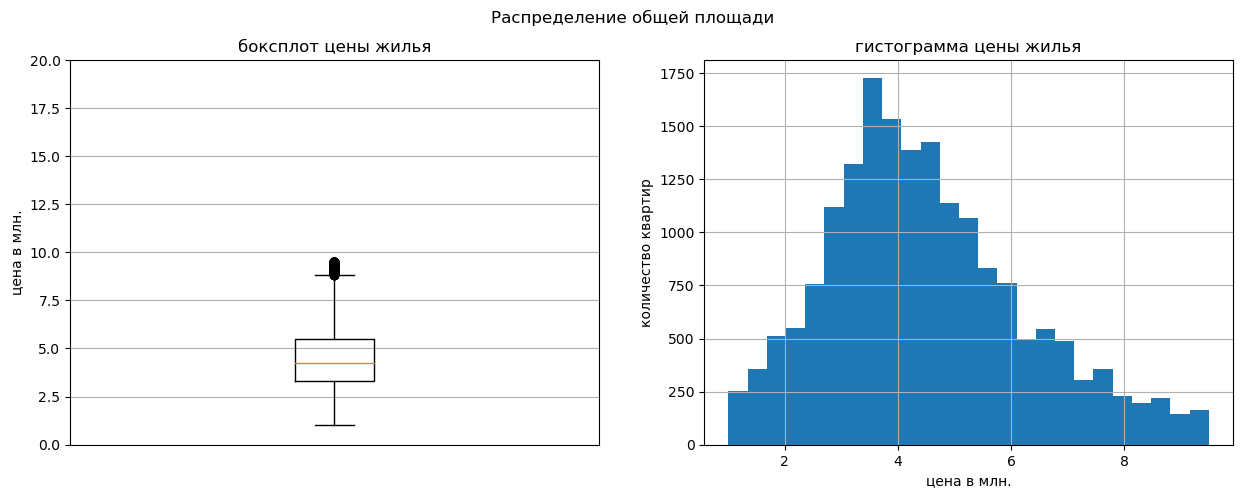

In [146]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение общей площади')
axis[0].boxplot(data['last_price'])
axis[0].set_title('боксплот цены жилья')
axis[0].set_ylabel("цена в млн.")
axis[0].set_xticks([])
axis[0].set_ylim(0,20)
axis[1].set_title('гистограмма цены жилья')
axis[1].hist(data['last_price'], bins = 25)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("цена в млн.")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

##### Анализ значений общей площади жилья

In [66]:
data = data[(data['last_price'] >=1)&(data['last_price'] <= 9.5)]#отброси значение цену менее 1 млн и более 12 млн 

In [67]:
data['total_area'].describe()#выведим характеристику данных

count    20364.000000
mean        51.736201
std         17.357900
min         12.000000
25%         39.000000
50%         48.000000
75%         62.000000
max        202.000000
Name: total_area, dtype: float64

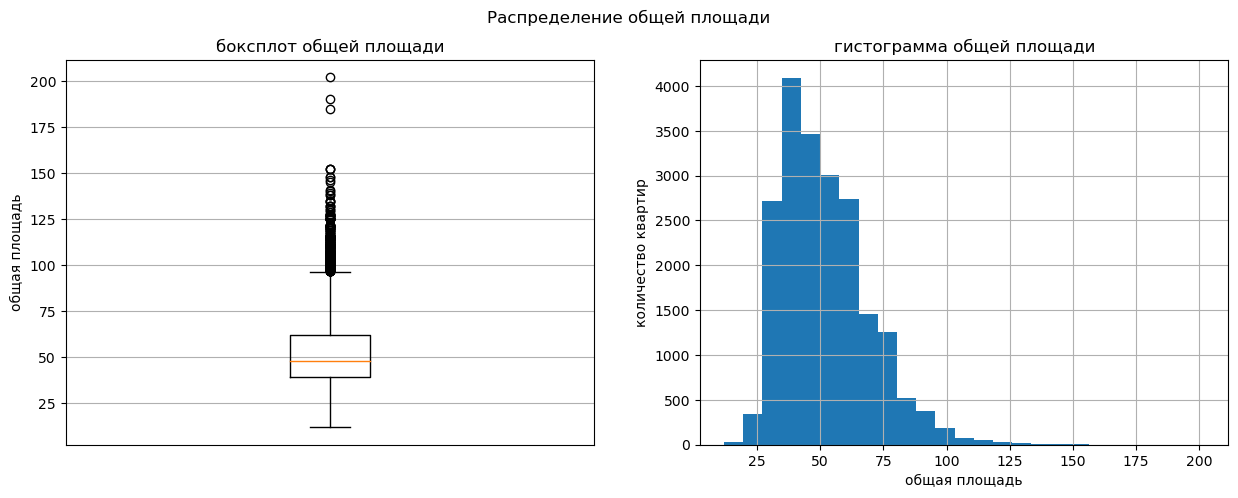

In [68]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение общей площади')
axis[0].boxplot(data['total_area'])
axis[0].set_title('боксплот общей площади')
axis[0].set_ylabel("общая площадь")
axis[0].set_xticks([])
axis[1].set_title('гистограмма общей площади')
axis[1].hist(data['total_area'], bins = 25)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("общая площадь")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

In [69]:
data = data[(data['total_area']<=100)&(data['total_area']>=20)]#отфильтруем значения ,более 100 кв м
#и менее 20 кв м

##### Анализ значений количества комнат жилья

In [70]:
data['rooms'].describe() #выведим описание данных о комнтах

count    20106.000000
mean         1.868348
std          0.864294
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

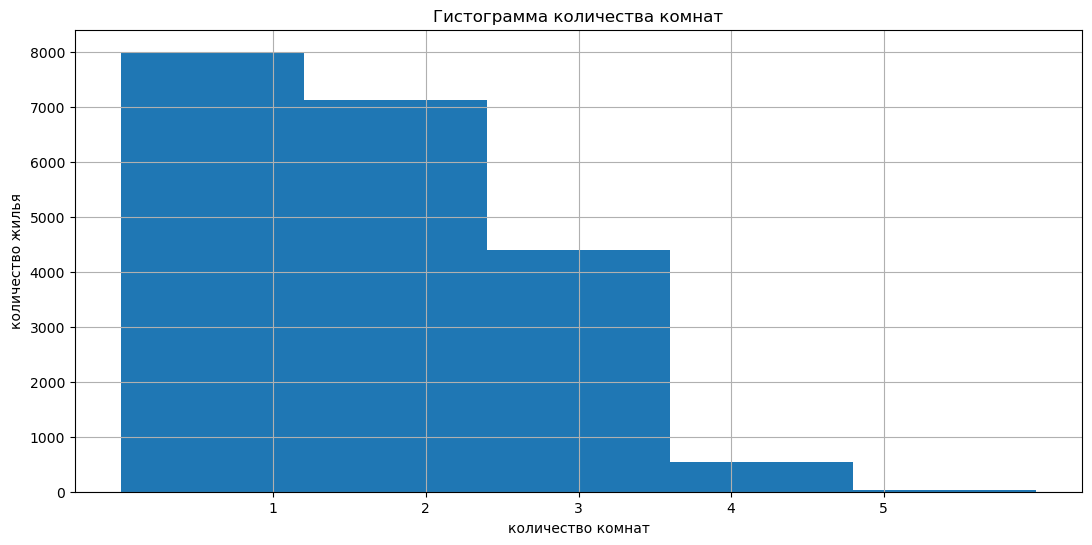

In [71]:
#построим гистограмму
plt.figure(figsize=(13,6))
plt.hist(data['rooms'], bins =5)
plt.grid()
plt.xticks([1,2,3,4,5])
plt.title('Гистограмма количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество жилья')
plt.show()

In [72]:
data = data[(data['rooms']<=5)&(data['rooms']>=1)]# отфильтруем количество комнот от 1 до 5

##### Анализ этажности домов

In [73]:
data['floors_total'].describe()#выведим описание данных 

count    19918.000000
mean        10.741088
std          6.603298
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

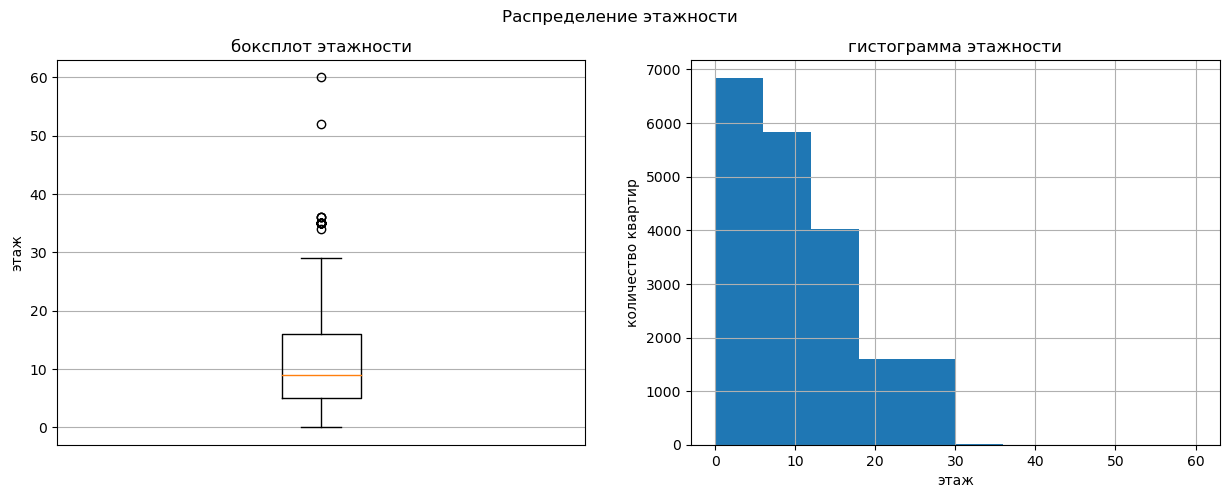

In [74]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение этажности')
axis[0].boxplot(data['floors_total'])
axis[0].set_title('боксплот этажности')
axis[0].set_ylabel("этаж")
axis[0].set_xticks([])
axis[1].set_title('гистограмма этажности')
axis[1].hist(data['floors_total'])
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("этаж")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

In [75]:
data = data[data['floors_total']<= 30]#отфильтруем данные здания менее 30 этажей

#### Анализ значений жилой площади

In [76]:
data['living_area'].describe()#выведем описпние данных о жилой площади

count    19894.000000
mean        29.305469
std         11.837233
min          2.000000
25%         18.000000
50%         29.000000
75%         38.000000
max         92.000000
Name: living_area, dtype: float64

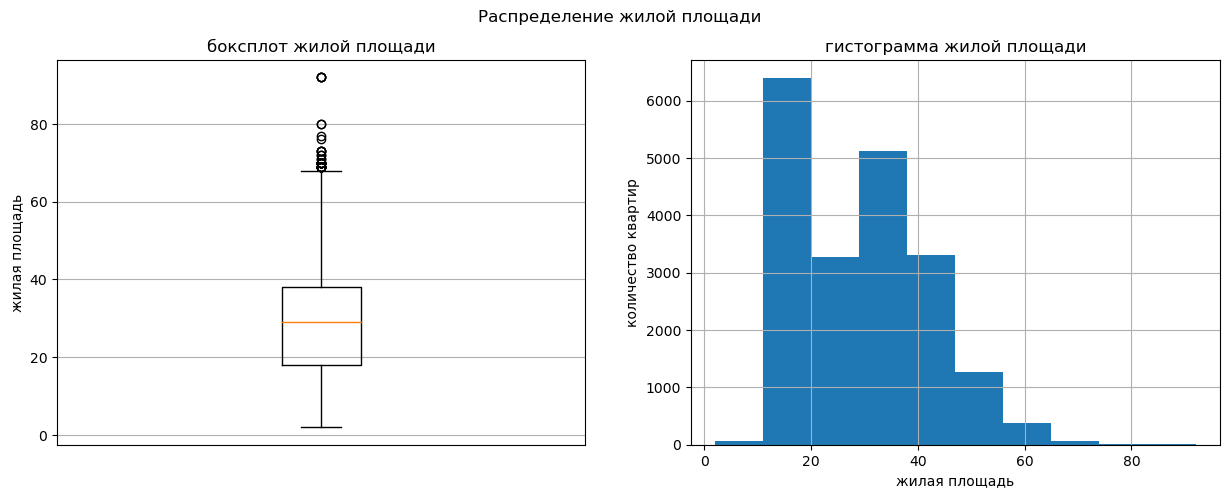

In [77]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение жилой площади')
axis[0].boxplot(data['living_area'])
axis[0].set_title('боксплот жилой площади')
axis[0].set_ylabel("жилая площадь")
axis[0].set_xticks([])
axis[1].set_title('гистограмма жилой площади')
axis[1].hist(data['living_area'])
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("жилая площадь")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

In [78]:
data = data[(data['living_area']>=15)&(data['living_area']<=70)]#отфильтруем данные от 15 до 70 кв м

##### Анализ значений  площади кухни

In [79]:
data['kitchen_area'].describe()#выведем описание данных

count    19312.000000
mean         9.217637
std          3.246061
min          0.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         48.000000
Name: kitchen_area, dtype: float64

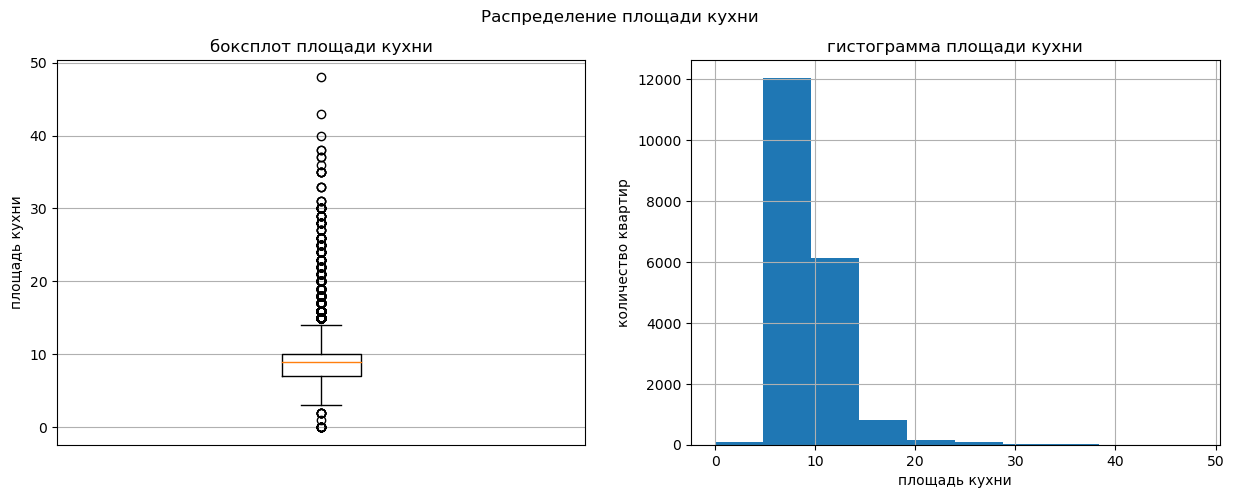

In [80]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение площади кухни')
axis[0].boxplot(data['kitchen_area'])
axis[0].set_title('боксплот площади кухни')
axis[0].set_ylabel("площадь кухни")
axis[0].set_xticks([])
axis[1].set_title('гистограмма площади кухни')
axis[1].hist(data['kitchen_area'])
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("площадь кухни")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

In [81]:
data = data[(data['kitchen_area']>=0)&(data['kitchen_area']<=14)] #отфильтруем данные о площади кухни от 0 до 14

##### Анализ значений количества балконов

In [82]:
data['balcony'].describe()

count    18236.000000
mean         0.583461
std          0.920056
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [83]:
data = data[data['balcony']<=2]#отфильтруем количество балконов менее 2

##### Проверка на явные дубликаты

In [84]:
data.duplicated().sum()#проверим данные на явные дубликаты

0

Явные дубликаты в данных отсутвуют

#### Вывод:
1. В ceiling_heigh удалили значения менее 2.5 и более 5 м, которые вряд ли встречаются в планировке жилья.
2. D last_price отфильтровали цену от 1 до 12 миллионов, как наиболее массовый диапазон цен.
3. В total_area отфильтровали площадь по нижнему значению (менее 20 кв м), как маловероятную и более 100 кв м, как редкую.
4. В rooms убрали значения менее 1 комнаты и более 5, оставив наиболее приемлимые значения.
5. floors_total убрали выбивающиеся значения более 30 этажей.
6. В living_area отфильтровали по аналогии с total_area.
7. В kitchen_area оставили приемлимые значения площади кухонь, с учетом студий и открытых планировок(от 0 до 17,5 кв м).
8. В balcony отсавилии не более 2 балконов, как наиболее вероятное значение.

### Добавление дополнительной информации

#### Добавление цены за квадратный метр

In [85]:
data['sq_m_price'] = (data['last_price']/data['total_area'])*1000000#Добавим цену за квадратный метр 

In [86]:
data['sq_m_price'] = data['sq_m_price'].astype('int') #переведем данные в int

#### Добавление временных параметров

In [87]:
data['first_day_exposition'] = data['first_day_exposition'].dt.date #приводим к временному формату
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64[M]') 

In [88]:
data['weekday'] = data['first_day_exposition'].dt.weekday#добавим день недели публикации

In [89]:
data['month'] = data['first_day_exposition'].dt.month#добавим месяц публикции объявления

In [90]:
data['year'] = data['first_day_exposition'].dt.year# добавим год публикации

#### Категоризация по этажности

In [91]:
def floor_type(index):#создадим функцию для категоризации этажей
    if index['floor'] == 1:
        return 'первый'
    elif index['floor'] == index['floors_total']:
        return 'последний'
    else:
        return'другой'
    
    

In [92]:
data['floor_ctg'] = data.apply(floor_type, axis = 1)#применим функцию и добавим новый столбец

In [93]:
data.head(10)#выведем данные с новым столбцом

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_names,sq_m_price,weekday,month,year,floor_ctg
1,7,3.35,40,2018-12-01,1,2.65,11,19,1,False,...,0,0,<NA>,81,Шушары,83750,5,12,2018,первый
2,10,5.196,56,2015-08-01,2,2.65,5,34,4,False,...,90,2,574,558,Санкт-Петербург,92785,5,8,2015,другой
8,20,2.9,33,2018-05-01,1,2.65,27,15,26,False,...,0,<NA>,<NA>,189,Мурино,87878,1,5,2018,другой
9,18,5.4,61,2017-02-01,3,2.50,9,44,7,False,...,0,0,<NA>,289,Санкт-Петербург,88524,2,2,2017,другой
10,5,5.05,40,2017-11-01,1,2.67,12,20,3,False,...,310,2,553,137,Санкт-Петербург,126250,2,11,2017,другой
11,9,3.3,44,2018-08-01,2,2.65,5,31,4,False,...,0,0,<NA>,7,Ломоносов,75000,2,8,2018,другой
12,10,3.89,54,2016-06-01,2,2.65,5,30,5,False,...,0,<NA>,<NA>,90,Сертолово,72037,2,6,2016,последний
13,20,3.55,43,2017-07-01,2,2.56,5,27,5,False,...,294,3,298,366,Петергоф,82558,5,7,2017,последний
14,1,4.4,36,2016-06-01,1,2.65,6,17,1,False,...,0,1,96,203,Пушкин,122222,2,6,2016,первый
15,16,4.65,39,2017-11-01,1,2.65,14,20,5,False,...,590,1,296,19,Санкт-Петербург,119230,2,11,2017,другой


#### Информация о расстоянии

In [94]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'])/1000 #пересчитаем данные в километрах

In [95]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('Int64')#переведем значения в тип int

### Исследовательский анализ данных

#### Изучение параметров

##### данные об общей площади

In [96]:
data['total_area'].describe()##выведим описание данных

count    17898.000000
mean        50.466030
std         15.115753
min         20.000000
25%         39.000000
50%         47.000000
75%         60.000000
max        100.000000
Name: total_area, dtype: float64

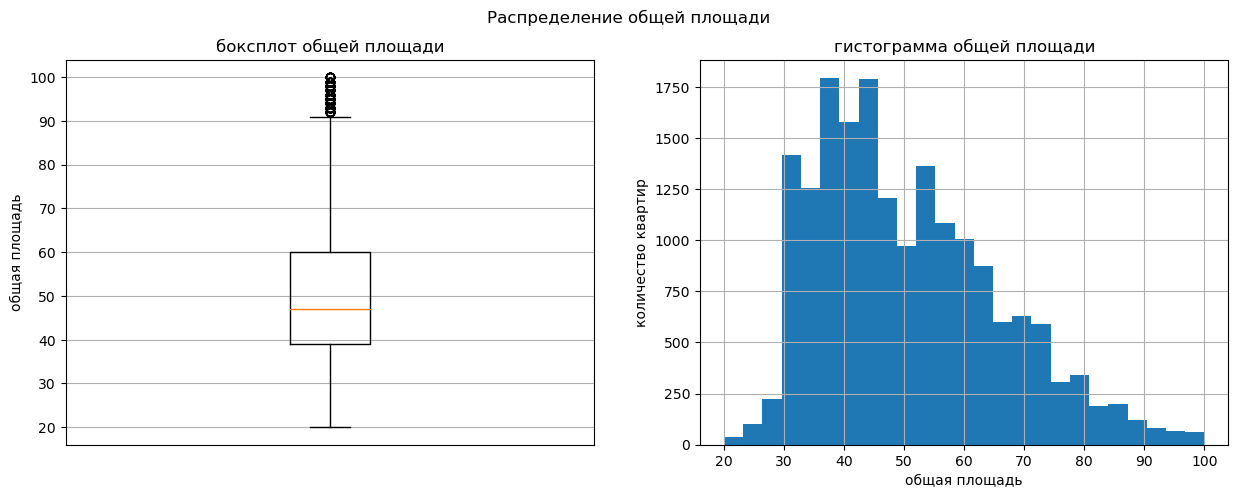

In [97]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение общей площади')
axis[0].boxplot(data['total_area'])
axis[0].set_title('боксплот общей площади')
axis[0].set_ylabel("общая площадь")
axis[0].set_xticks([])
axis[1].set_title('гистограмма общей площади')
axis[1].hist(data['total_area'], bins = 25)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("общая площадь")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

Значения площади после фильтрации лежит в пределах от 20 до 100 кв м. Среднее значение общей площади 50 кв м. По гистограмме видно нормальное распределние. 

##### данные о жилой площади

In [98]:
data['living_area'].describe()#выведим описание данных

count    17898.000000
mean        29.328975
std         11.404123
min         15.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         70.000000
Name: living_area, dtype: float64

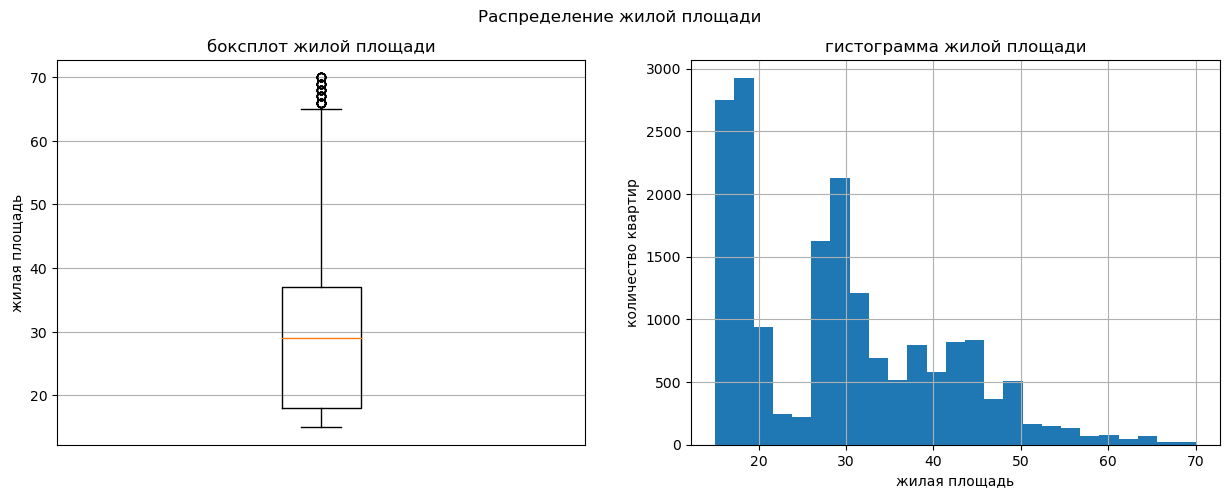

In [99]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение жилой площади')
axis[0].boxplot(data['living_area'])
axis[0].set_title('боксплот жилой площади')
axis[0].set_ylabel("жилая площадь")
axis[0].set_xticks([])
axis[1].set_title('гистограмма жилой площади')
axis[1].hist(data['living_area'], bins = 25)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("жилая площадь")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

Значения жилой площади лежит в пределах от 15 кв. м до 70 кв. м.Среднее значение 29 кв. м По гистограмме видно что распределние не раномерно, так как можно наблюдать два пика.

##### данные о площади кухни

In [100]:
data['kitchen_area'].describe()# выведем описание данных для площади кухни 

count    17898.000000
mean         8.676724
std          2.244978
min          0.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         14.000000
Name: kitchen_area, dtype: float64

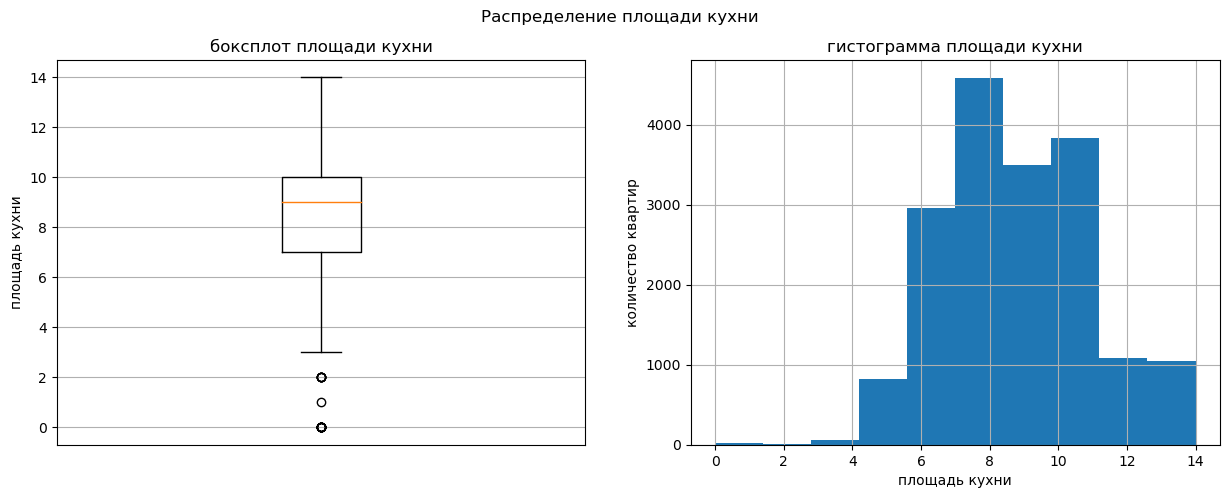

In [101]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение площади кухни')
axis[0].boxplot(data['kitchen_area'])
axis[0].set_title('боксплот площади кухни')
axis[0].set_ylabel("площадь кухни")
axis[0].set_xticks([])
axis[1].set_title('гистограмма площади кухни')
axis[1].hist(data['kitchen_area'], bins = 10)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("площадь кухни")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

После фильтрации значение площади кохонь лежит в пределах от 0 до 14 кв. м. среднее значение площади составляет 9 кв. м. По гистограме видно нормальное распределние. По диаграмме видно нулевое значение, как вборс. Однако, нулевое значение приняли для студий и открытых планировок

##### данные о цене

In [102]:
data['last_price'].describe()

count    17898.000000
mean         4.494199
std          1.753654
min          1.000000
25%          3.299000
50%          4.250000
75%          5.500000
max          9.500000
Name: last_price, dtype: float64

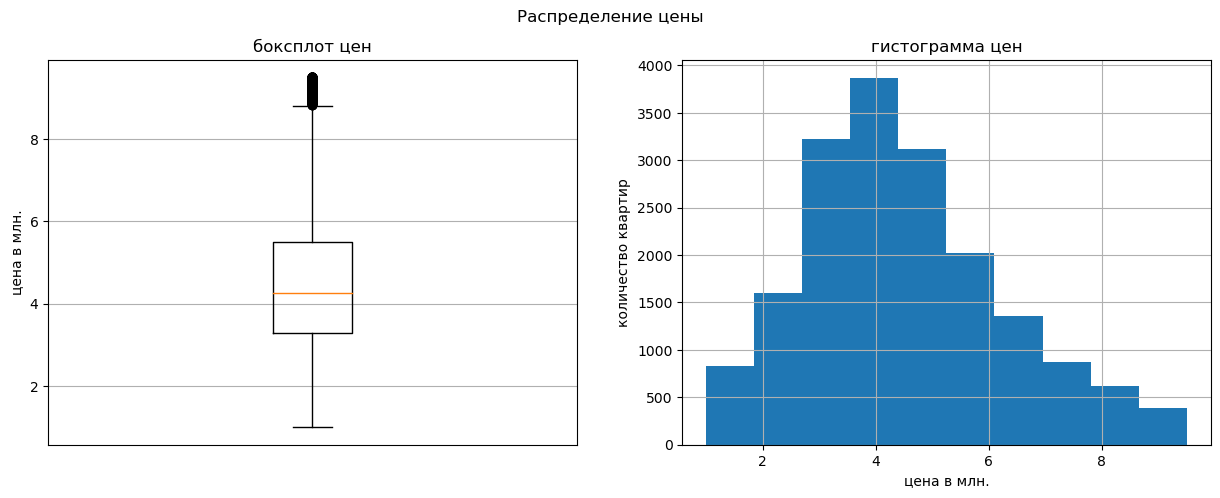

In [103]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение цены')
axis[0].boxplot(data['last_price'])
axis[0].set_title('боксплот цен')
axis[0].set_ylabel("цена в млн.")
axis[0].set_xticks([])
axis[1].set_title('гистограмма цен')
axis[1].hist(data['last_price'], bins = 10)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("цена в млн.")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

После фильтрации цена лежит в пределах от 1.85 млн до 10 млн. Среднее значеине 4.5 млн. По гистограмме видно нормальное распределние.

##### данные о количестве комнат

In [104]:
data['rooms'].describe()#выведем описание данных для количества комнат

count    17898.000000
mean         1.885462
std          0.842427
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rooms, dtype: float64

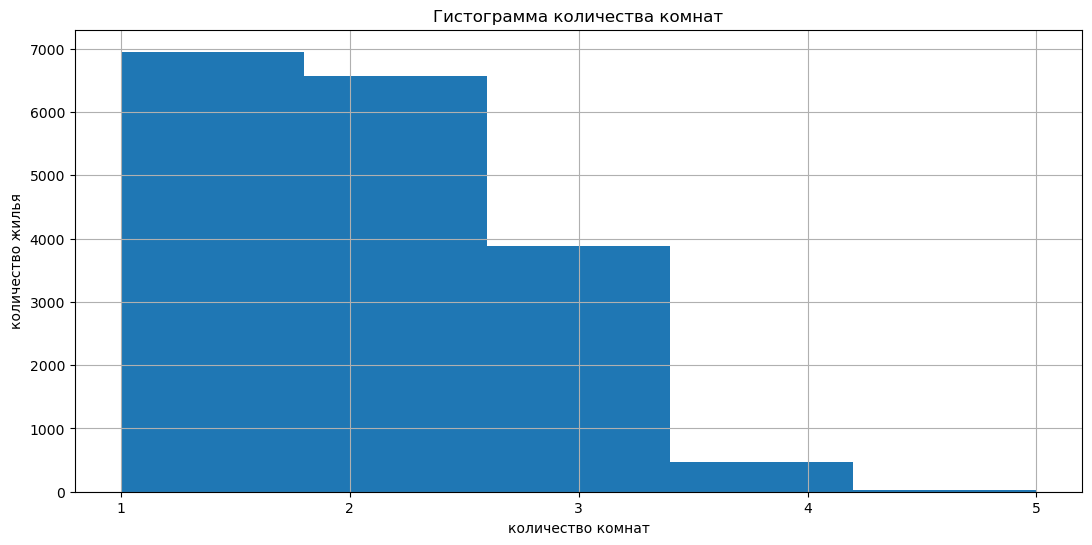

In [105]:
plt.figure(figsize=(13,6))
plt.hist(data['rooms'], bins =5)
plt.grid()
plt.xticks([1,2,3,4,5])
plt.title('Гистограмма количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество жилья')
plt.show()

Количество комнат лежит в пределах от 1 до 5 после фильтрации. По гистограмме видно, что наиболее количство предложений до 3 комнат.

##### Данные о высоте потолков

In [106]:
data['ceiling_height'].describe()# выведем описнаие данных для выстоты потолков

count    17898.000000
mean         2.657971
std          0.161244
min          2.500000
25%          2.560000
50%          2.650000
75%          2.650000
max          4.500000
Name: ceiling_height, dtype: float64

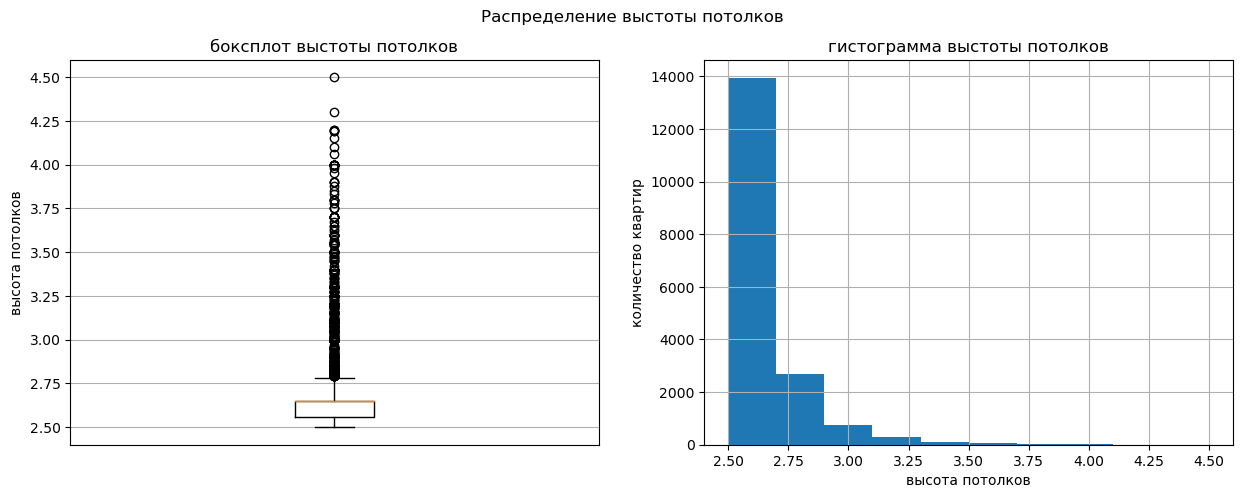

In [107]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение выстоты потолков')
axis[0].boxplot(data['ceiling_height'])
axis[0].set_title('боксплот выстоты потолков')
axis[0].set_ylabel("высота потолков")
axis[0].set_xticks([])
axis[1].set_title('гистограмма выстоты потолков')
axis[1].hist(data['ceiling_height'], bins = 10)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("высота потолков")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

После фильтрации высота потолков лежит в пределах от 2.5 до 4 метров. Подавляющее число квартир имеет потолки менее 3 метров.  

##### Данные об этаже квартиры

In [108]:
data['floor'].describe()# выведем описание данных

count    17898.000000
mean         5.745279
std          4.758607
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<AxesSubplot:>

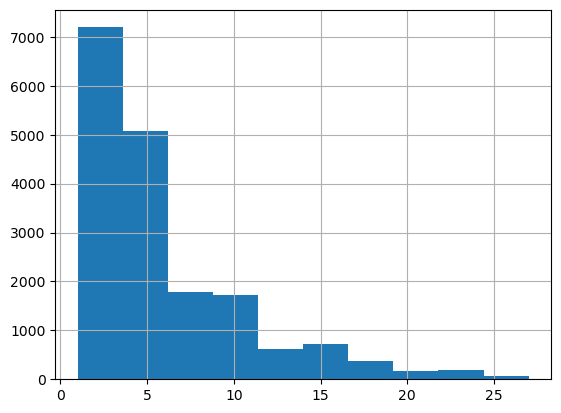

In [109]:
data['floor'].hist()#построим гистограмму 

После фильтрации данные о этажности ограничены 30 этажем. По гистограмме видно, что , большая предложений расположены ниже 10 этажа.

##### Даные о типе этажа квартиры

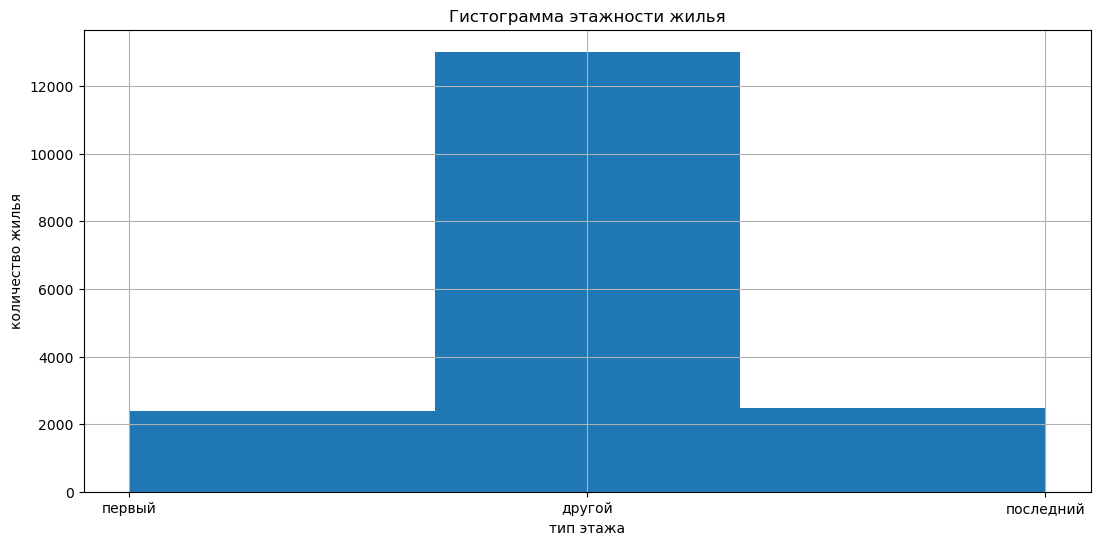

In [110]:
plt.figure(figsize=(13,6))
plt.hist(data['floor_ctg'], bins =3)
plt.grid()
plt.title('Гистограмма этажности жилья')
plt.xlabel('тип этажа')
plt.ylabel('количество жилья')
plt.show()

По гистограмме видно, что большинство предложений расположенных на промежуточных этажах. Предложения на первом и последнем этаже примерно равны.

##### Данные об этажности домов

In [111]:
data['floors_total'].describe()#выведем описание данных 

count    17898.000000
mean        10.458487
std          6.416734
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         28.000000
Name: floors_total, dtype: float64

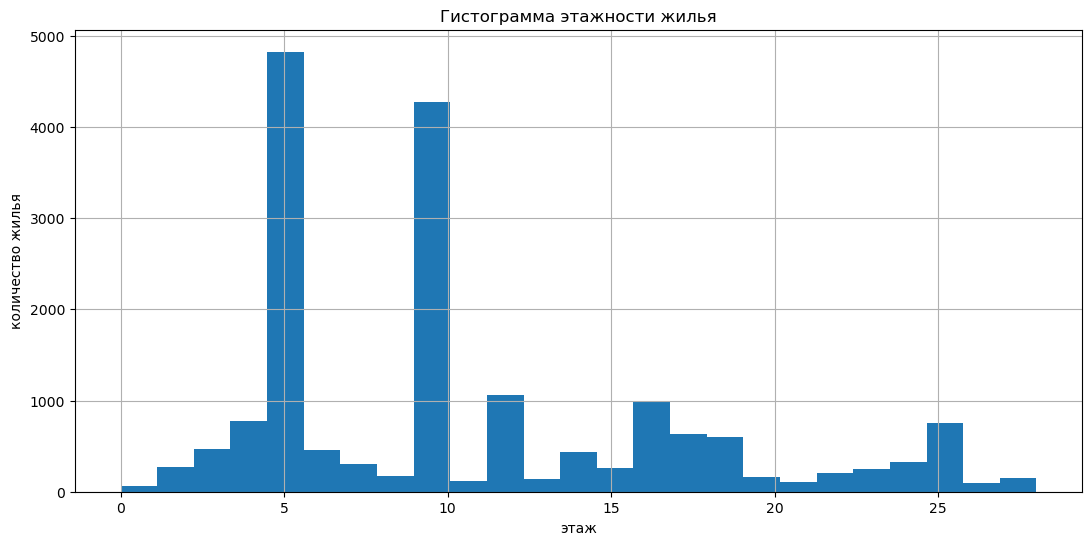

In [112]:
plt.figure(figsize=(13,6))
plt.hist(data['floors_total'], bins =25)
plt.grid()
plt.title('Гистограмма этажности жилья')
plt.xlabel('этаж')
plt.ylabel('количество жилья')
plt.show()#построим гистограмму

Большинство домов имееют до 10 этажей. Пик распологается в области 5 этажей.

##### Данные о расстоянии до центра города

In [113]:
data['cityCenters_nearest'].describe()

count    17898.000000
mean     11551.439099
std      10004.802777
min          0.000000
25%          0.000000
50%      11982.000000
75%      15711.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

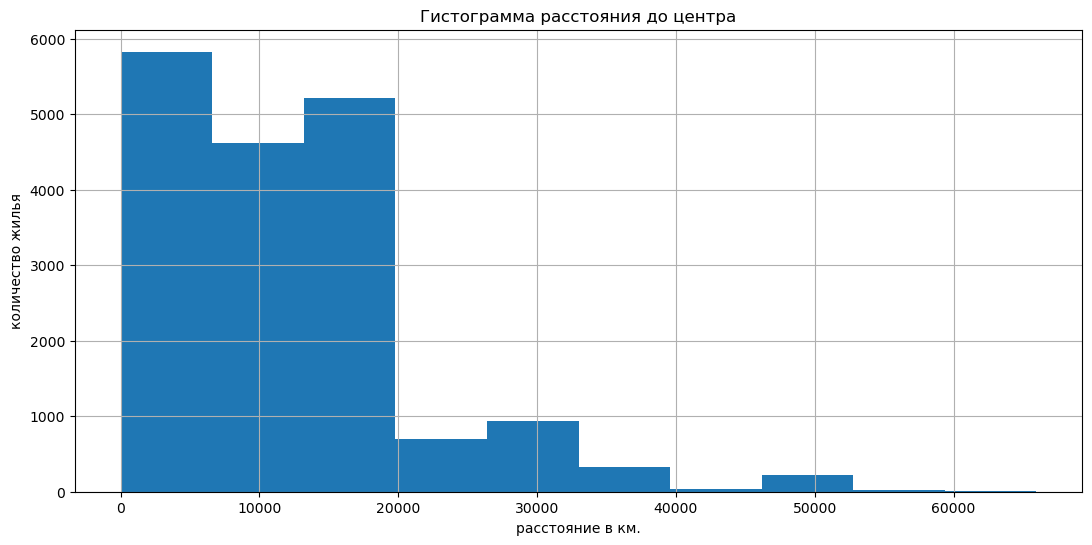

In [114]:
plt.figure(figsize=(13,6))
plt.hist(data['cityCenters_nearest'], bins = 10)
plt.grid()
plt.title('Гистограмма расстояния до центра')
plt.xlabel('расстояние в км.')
plt.ylabel('количество жилья')
plt.show()#построим гистограмму

По гистограмме видно, что большинство предложений располагается до 20 км от центра. Присутсвуют пики в районе 30 км и 50 км.

##### Данные о расстоянии до аэропорта

In [115]:
data['airports_nearest'].describe()# выведем описание данных 

count    17898.000000
mean     21478.546933
std      16994.263674
min          0.000000
25%          0.000000
50%      20043.000000
75%      34726.000000
max      84869.000000
Name: airports_nearest, dtype: float64

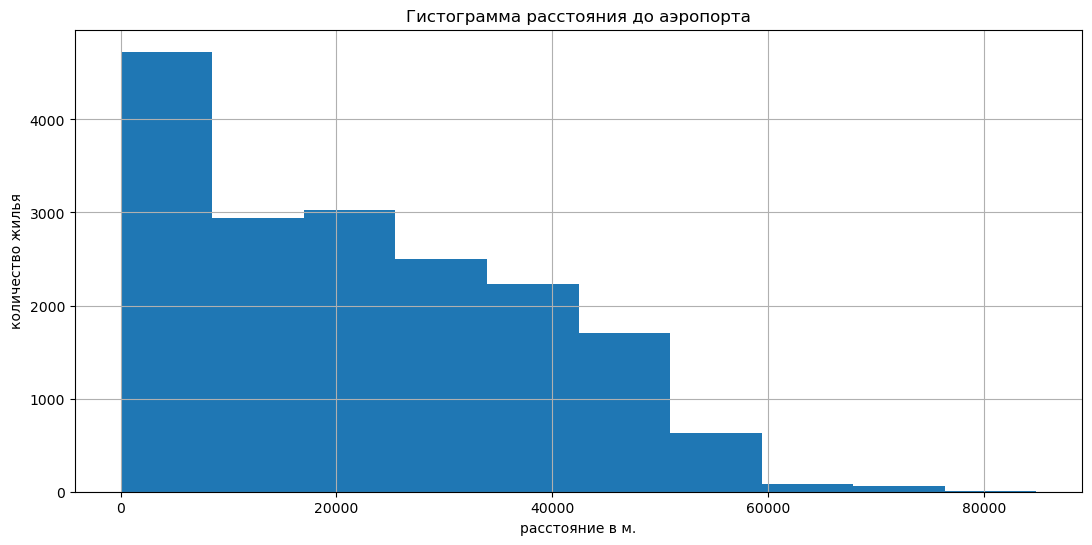

In [116]:
plt.figure(figsize=(13,6))
plt.hist(data['airports_nearest'], bins = 10)
plt.grid()
plt.title('Гистограмма расстояния до аэропорта')
plt.xlabel('расстояние в м.')
plt.ylabel('количество жилья')
plt.show()#построим гистограмму

По гистограмме видно, что большинство предложений расположено в пределах от 10 до 40 км от ближайшего аэропорта. Среднее расстояние до ближайшего аэропорта 29 км.

##### Данные о расстоянии до ближайшего парка

In [117]:
data['parks_nearest'].describe()

count    17898.000000
mean       146.660297
std        284.218413
min          0.000000
25%          0.000000
50%          0.000000
75%        226.000000
max       3190.000000
Name: parks_nearest, dtype: float64

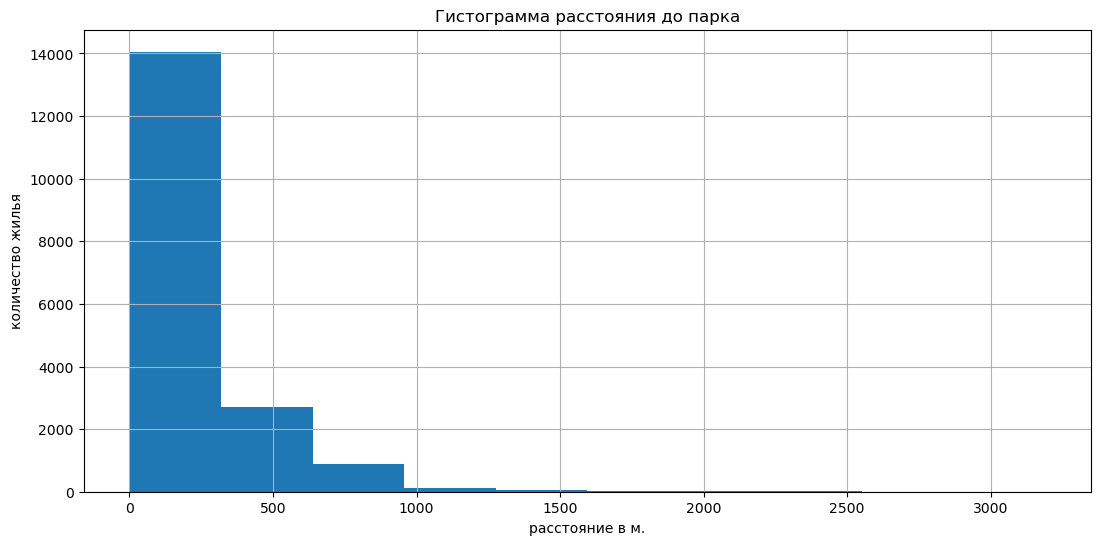

In [118]:
plt.figure(figsize=(13,6))
plt.hist(data['parks_nearest'], bins = 10)
plt.grid()
plt.title('Гистограмма расстояния до парка')
plt.xlabel('расстояние в м.')
plt.ylabel('количество жилья')
plt.show()#построим гистограмму

По гистограмме видно, что большинство квартир расположено не далее 1 км от ближайшего парка. Среднее расстояние до ближайшего парка составляет 146 метров.

##### Данные о дне и месяце публикаций

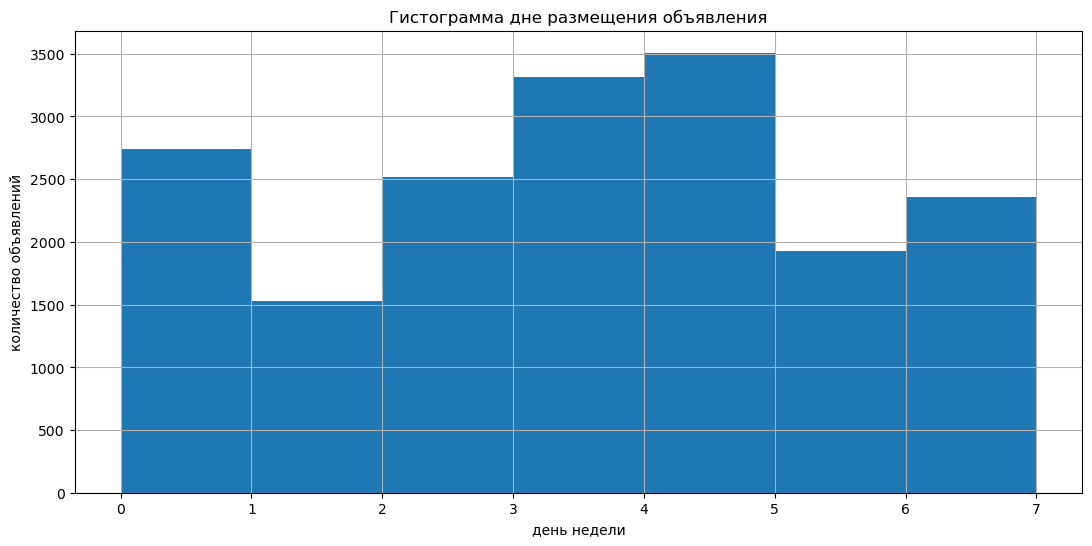

In [119]:
plt.figure(figsize=(13,6))
plt.hist(data['weekday'], bins = 7, range = (0,7))
plt.grid()
plt.title('Гистограмма дне размещения объявления')
plt.xlabel('день недели')
plt.ylabel('количество объявлений')
plt.show()#построим гистограмму

По диаграмме можно отметить, что большинство объявлений размещаются в будни. В выходные количество размещенных объявлений гораздо меньше.

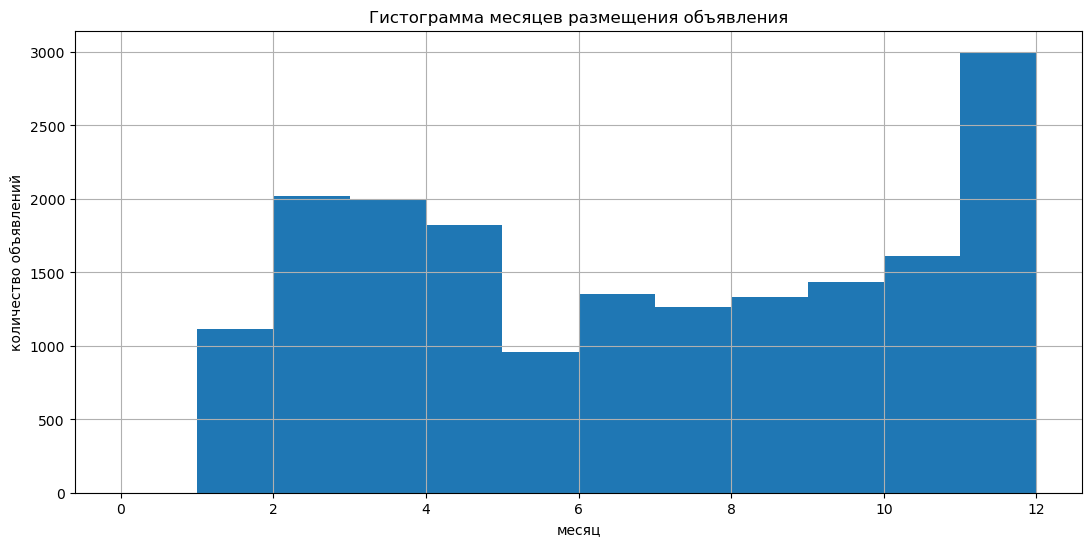

In [120]:
plt.figure(figsize=(13,6))
plt.hist(data['month'], bins = 12, range = (0,12))
plt.grid()
plt.title('Гистограмма месяцев размещения объявления')
plt.xlabel('месяц')
plt.ylabel('количество объявлений')
plt.show()#построим гистограмму

По гистограмме видно, что значительное количество объявлений размещаеться в декабре. В январе виден спад размещения. В целом в остальные месяцы количество размещений примерно равно, с небольшим пиком в марте и апреле.

#### Изучение скорости продажи квартир

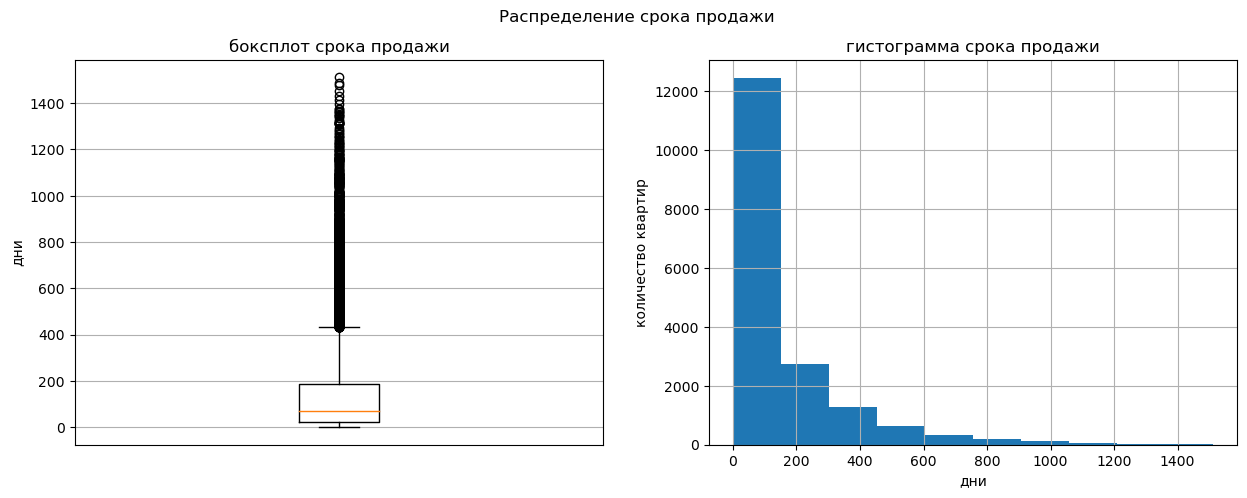

In [121]:
figure, axis = plt.subplots(nrows= 1 , ncols= 2, figsize=(15,5))
figure.suptitle('Распределение срока продажи')
axis[0].boxplot(data['days_exposition'])
axis[0].set_title('боксплот срока продажи')
axis[0].set_ylabel("дни")
axis[0].set_xticks([])
axis[1].set_title('гистограмма срока продажи')
axis[1].hist(data['days_exposition'], bins = 10)
axis[1].set_ylabel("количество квартир")
axis[1].set_xlabel("дни")
axis[0].grid(axis = 'y')
axis[1].grid()
plt.show()

In [122]:
data['days_exposition'].mean()#посчитаем среднее количество дней продажи квартиры

148.07710358699296

In [123]:
data['days_exposition'].median()#посчитаем медиану количество дней продажи квартиры

69.0

##### Вывод:
По гистограмме видно, что значительная часть квартир продается до 200 дней. Среднее время продажи квартиры составляет 167 дня. Медианное значение времени продажи составляет 89 дней. Быстрыми продажами можно считать те предложения, которые реализуются до 89 дней. Долгими можно считать продажи более 500 дней.

#### Определение факторов, влияющих на полную стоймость квартиры.

##### Определение влияния общей площади на полную стоймость квартиры

In [124]:
total_area_price = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median').reset_index() #создадим сводную таблицу

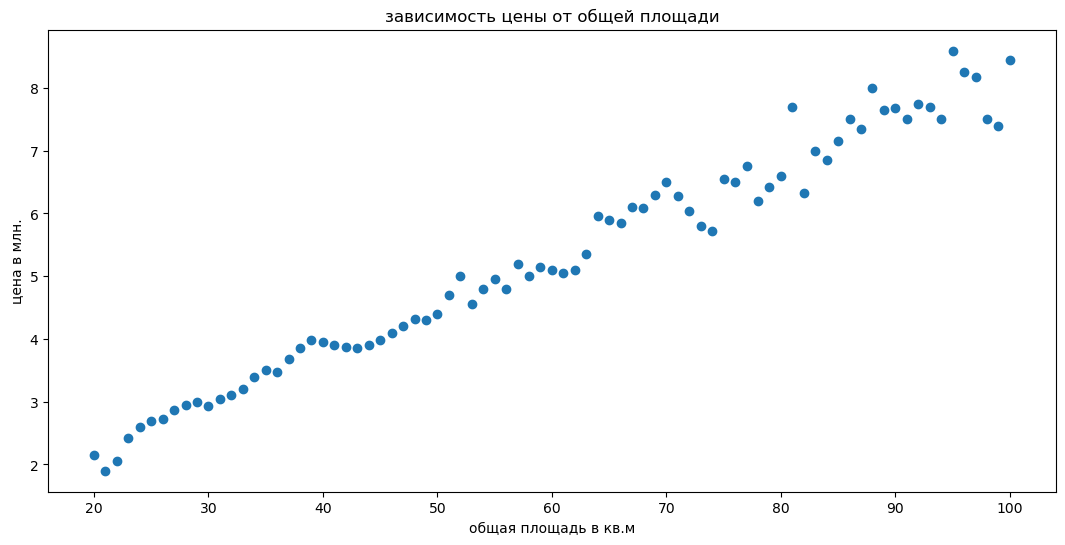

In [125]:
plt.figure(figsize=(13,6))
plt.scatter(y = total_area_price['last_price'], x = total_area_price['total_area'])
plt.title('зависимость цены от общей площади') 
plt.xlabel('общая площадь в кв.м')
plt.ylabel('цена в млн.')
plt.show()

In [126]:
data[['last_price', 'total_area']].corr()#посчитаем коэффициент Пирсона

,last_price,total_area
last_price,1.00000,0.62408
total_area,0.62408,1.00000


Проанализировав график и посчитатав коэффициент пирсона(равный 0.62), можно сделать вывод о том, что имеется сильная зависимость между ценой квартиры и общей ёё площадью.

##### Определение влияния жилой площади на полную цену квартиры

In [127]:
living_area_price = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median').reset_index() #создадим сводную таблицу

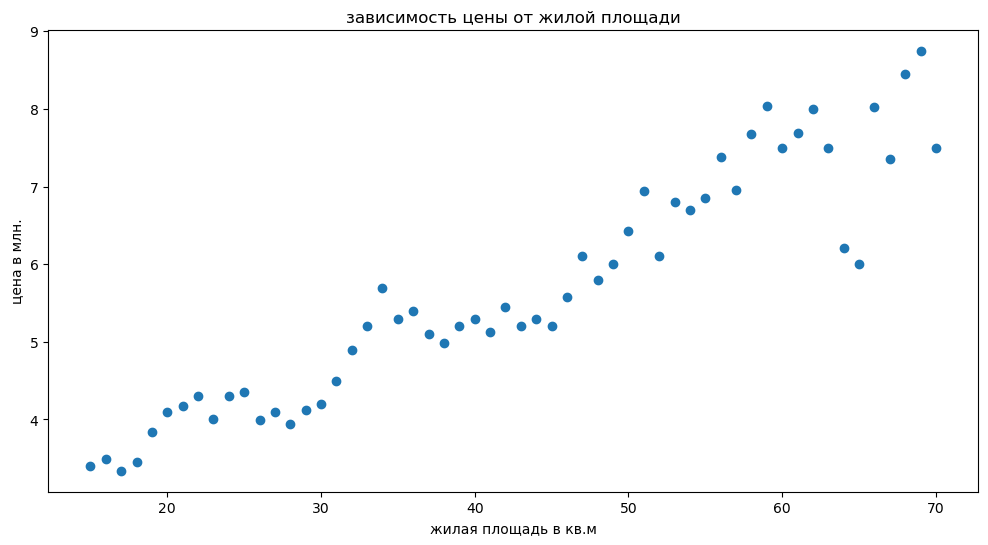

In [128]:
plt.figure(figsize=(12,6))
plt.scatter(y = living_area_price['last_price'], x = living_area_price['living_area'])
plt.title('зависимость цены от жилой площади') 
plt.xlabel('жилая площадь в кв.м')
plt.ylabel('цена в млн.')
plt.show()

In [129]:
data[['last_price', 'living_area']].corr()#посчитаем коэффициент Пирсона 

,last_price,living_area
last_price,1.000000,0.493028
living_area,0.493028,1.000000


Изучив график и посчитав коэффициент Пирсона(равный 0.61), можно сделать вывод, что имеется прямая зависимоть между жилой площадью и ценой квартиры, однако, несоклько слабее, чем между полной площадью и ценой.

##### Определение влияния площади кухни на полную цену квартиры

In [130]:
kitchen_price = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc ='median')#создадим сводную таблицу

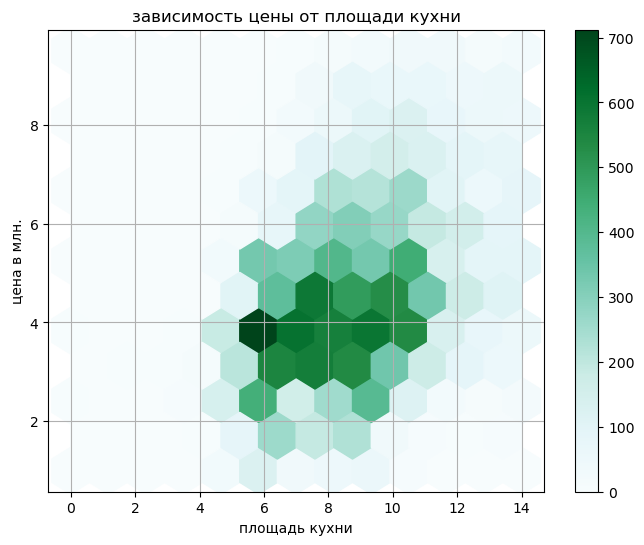

In [131]:
data.plot(x = 'kitchen_area', y = 'last_price', kind =  'hexbin', gridsize=12, figsize=(8, 6), sharex=False, grid=True)
plt.title('зависимость цены от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('цена в млн.')
plt.show(); #построим график тип hexbin

In [132]:
data[['last_price', 'kitchen_area']].corr()#посчитаем коэффициент Пирсона

,last_price,kitchen_area
last_price,1.000000,0.382819
kitchen_area,0.382819,1.000000


По графику наблюдается положжительная зависимость между площадью кухни и полной ценой квартиры. Наибольшая плотность предложений наблюдается в области от ~ 5 до 12 кв м и от 2 до 6 млн. Коэффициент пирсона показывает среднюю зависимость. 

##### Определение влияния типа этажа на наполную стоймость квартиры 

In [133]:
floor_ctg_price = data.pivot_table(index = 'floor_ctg', values = 'last_price', aggfunc = 'median').reset_index()#создадим сводную таблицу
floor_ctg_price = floor_ctg_price.sort_values(by = 'last_price', ascending = False)

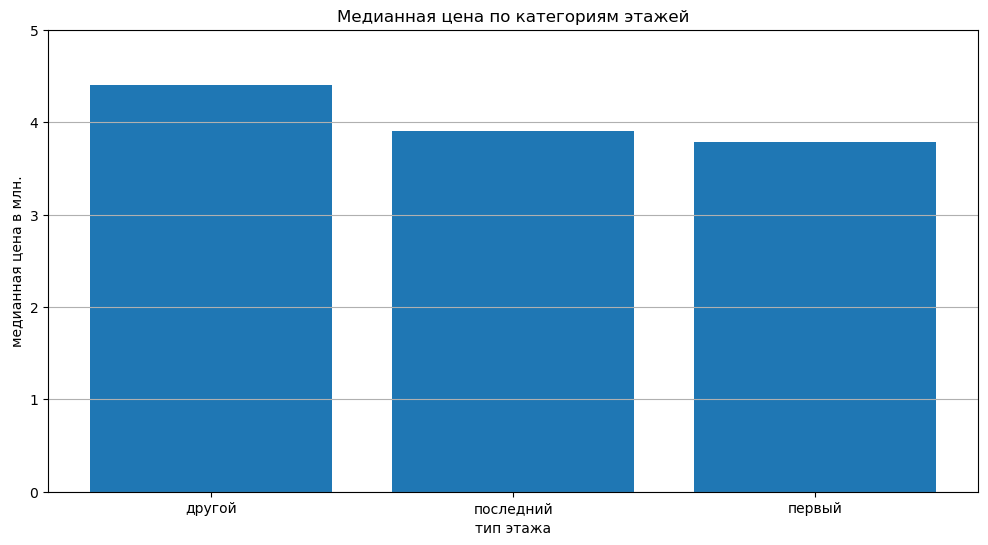

In [134]:
plt.figure(figsize=(12,6))
plt.bar(floor_ctg_price['floor_ctg'], floor_ctg_price['last_price'])
plt.grid(axis = 'y')
plt.ylim(0,5)
plt.title('Медианная цена по категориям этажей')
plt.xlabel('тип этажа')
plt.ylabel('медианная цена в млн.')
plt.show();

Из графика видно, что самые дешевые квартиры на первом этаже, затем идут квартиры на верхних этажах, а самые высокие цены на промежуточных.

##### Определение зависимости цены квартиры от дня недели, месяца и года публикации объявления

In [135]:
day_price = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').reset_index()#создадим сводную таблицу

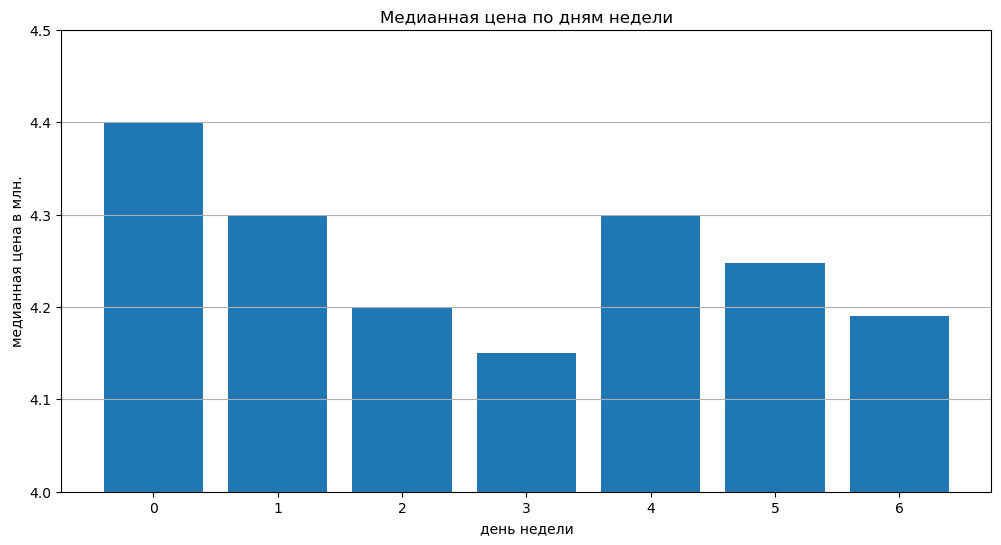

In [136]:
plt.figure(figsize=(12,6))
plt.bar(day_price['weekday'], day_price['last_price'])
plt.grid(axis = 'y')
plt.ylim(4,4.5)
plt.title('Медианная цена по дням недели')
plt.xlabel('день недели')
plt.ylabel('медианная цена в млн.')
plt.show();

Пики цен предложений расположены в понедельник, среду и субботу. Наименьшие ценовые предложения размещены в четверг и среду.

In [137]:
month_price = data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').reset_index()# создадим сводную таблицу

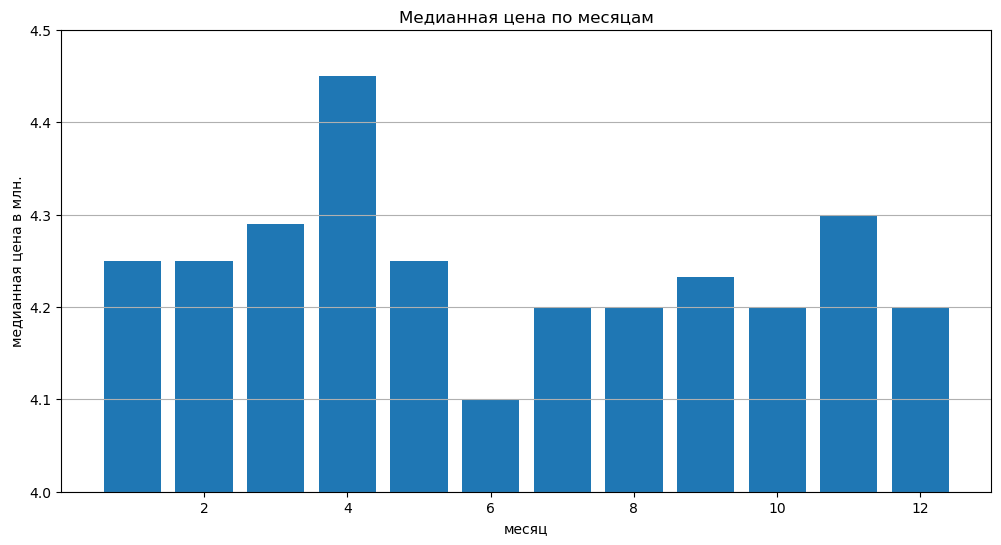

In [138]:
plt.figure(figsize=(12,6))
plt.bar(month_price['month'], month_price['last_price'])
plt.grid(axis = 'y')
plt.ylim(4,4.5)
plt.title('Медианная цена по месяцам')
plt.xlabel('месяц')
plt.ylabel('медианная цена в млн.')
plt.show();

Пик цен приходится на весну и окончание года. В начале лета наблюдается значительный спад цен, что видимо связано с началом периода отпусков.

In [139]:
year_price = data.pivot_table( index = 'year', values = 'last_price', aggfunc = 'median').reset_index()#создадим сводную таблицу

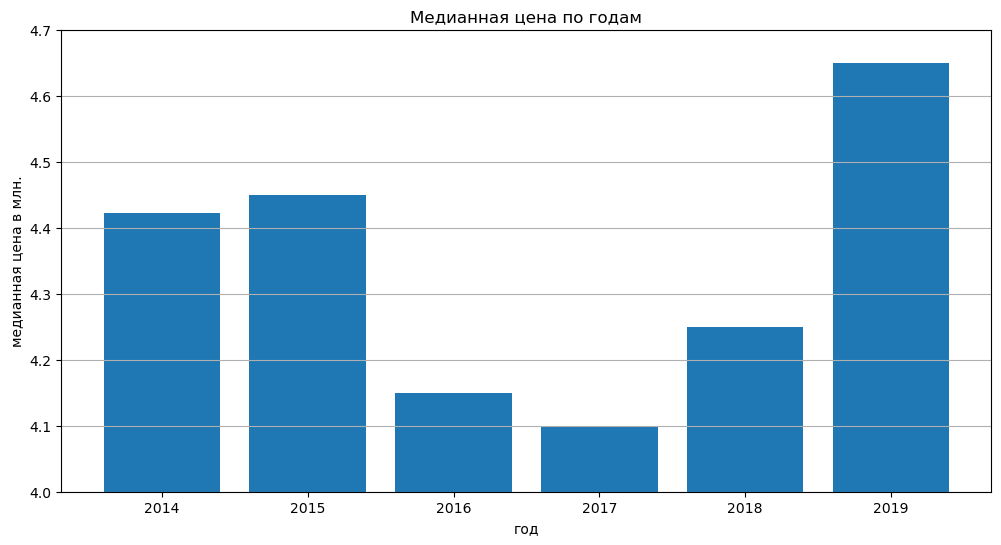

In [140]:
plt.figure(figsize=(12,6))
plt.bar(year_price['year'], year_price['last_price'])
plt.grid(axis = 'y')
plt.ylim(4,4.7)
plt.title('Медианная цена по годам')
plt.xlabel('год')
plt.ylabel('медианная цена в млн.')
plt.show();

До 2015 года наблюдается плато цен. С 2015 года до 2017 года присходит снижение полной цена. С 2017 наблюдается резкий рост цен.

#### Минимальная и максимальная цена квадратного метра 

In [141]:
price_index = data.pivot_table(index = 'locality_names', values = 'sq_m_price', aggfunc = ['median','count']).reset_index()
#создадим сводную таблицу посчитав среднюю цену за кв м и количестов объявлений по городам

In [142]:
price_index.columns =['index', 'mean_price_sq_m', 'quantity'] # переименуем столбцы

In [143]:
price_index['mean_price_sq_m'] = price_index['mean_price_sq_m'].astype('Int64')#изменим тип данных в столбце со средней ценой

TypeError: cannot safely cast non-equivalent float64 to int64

In [ ]:
price_index.sort_values('quantity', ascending = False).head(10)#выведем отсортированые по убыванию значения

In [ ]:
price_index.sort_values('mean_price_sq_m', ascending = False).head(1)#выведем населенный пункт с наибольшей ценой квадратного метра

In [ ]:
price_index.sort_values('mean_price_sq_m').head(1)#выведем населенные с наименьшей ценой квадратного метра

##### Вывод: 
Нибольшее число объеялений приходится на Санкт-Петербург. Санкт-Петербург же имеет наибольшую среднюю цену за квадратный метр. В Житково наименьшая средняя цена за квадратный метр равная 73503.

#### Определение цены одного километра

In [ ]:
SP_price = data[data['locality_names'] == 'Санкт-Петербург']#отфильтруем строки для Санкт-Петербурга

In [ ]:
SP_price_km = SP_price.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean').reset_index()
#создадим сводную таблицу средней цены по удалению от центра.

In [ ]:
plt.figure(figsize = (13,6))
plt.plot(SP_price_km['cityCenters_nearest_km'], SP_price_km['last_price'])
plt.grid()
plt.xlim(0,30)
plt.title('Динамика цен в расстоянии от центра Санкт-Петербурга, км.')
plt.xlabel('расстояние от центра Санкт-Петербурга')
plt.ylabel('средняя цена в млн.')
plt.show()

##### Вывод:
Рассматривая график можно увидеть, что средняя цена квартиры убывает по удалению от центра. в пригороде(~27 км) колебание цены за кв. м.

### Общий вывод:
В данном исследовании провели следующую предобработку данных:
    
- опредлелили пропущенные значения и заполнили их при возможности;
- изменили типы представленных данных для удобства производства оценки;
- проработали дубликаты наименовний населенных пунктов для исключения дублирования и удобства последующей группировки;
- предобработали представленные данные, удалив аномльные и редкие значения;
- добавили дополнительную информцию необходимую для анализа;</b>
После предобработки данных провели анализ следующих показателей:
1. Общая площадь:
- Средняя общая площадь составялет 50 кв.м для выборки предложений от 20 кв.м до 100 кв. м.

2. Жилая площадь:

- Среднее значение жилой площади составляет 31 кв. м при. На диаграмме видно не равномерное распределние предложений с несколькими пиками.
3. Площадь кухни: 
- среднее значение площади кухни 9 кв. м.
4. Цена квартиры:
- Диапазон цен лежит в пределах от 1.85 млн до 10 млн. Среднее значеине 4.5 млн. По гистограмме видно нормальное распределние.
5. Количество комнат: 
- среднее значение комнат в выборке равно 2. По гистограмме видно, что большинство предложений имеет до 3 комнат.
6. Высота потолков:
- среднее значение высоты потолка составляет 2.7 м. Большинство предложений имеет высоту потолка до 3 метров.
7. Этаж квартиры: 
- среднее значение этажа распложения равно 5. Большинство предложений распложены ниже 10 этажа.
8. Данные о типе квартиры: 
- большинство предложений расположены на промежуточных этажах. Количестов предложений на первых и последних этажах примерно равны.
9. Данные об этажности домов:
- средняя этажность домов составляет 10 этажей.
10. Расстояние до центра города:
- среднее растояние до центра города составялет ~ 15 км. Большинство предложений размещено не далее 20 км от центра.
11. Расстояние до ближайшего аэропорта: 
- среднее расстояние до ближайшего аэропорта составляет ~29 км. Большинство предложений расположено не далее 40 км от ближайшего аэропорта.
12. Расстояние до ближайшего парка:
- Среднее расстояние до ближайшего парка составляет 482 м. Большинство предложений расположено не далее 1 км от ближайшего парка.
13. Данные о дне и месяце публикации: 
- Большиство объявлений публикуется в будние дни;
- Пик размещений объвлений находится в декабре, марте и апреле.В январе нулевая активность. В целом количество объевлений в течений года равномерно, с небольшой просадкой в начале лета.
14. Скорость продажи квартир: 
- среднее время продажи квартиры составляет 167 дня. Медианное значение  Быстрыми продажами можно считать те предложения, которые реализуются до 89 дней. Долгими можно считать продажи более 500 дней.
Следующие аналитические задачи были описаны: 
1. Влияние общей площади на стоймость квартиры: 
- была определена сильная положительная зависимость стоймости от величины общей площади.
2. Влияние общей площади на стоймость квартиры:
- была определена положительная зависмоть стоймости от величины жилой площади, несоклько слабее чем от общей.
3. Влияние площади кухни на стоймость: 
- <b> была определена средняя положительная зависимость между площадью кухни и стоймостью предложения </b>
4. Влиние типа этажа на стоймость квартиры:
- Предложения на первых этажах имеют наименьшую среднюю цену. Затем идут предложения на последних этажах. Наибольшая средняя цена на промежуточных этажах.
5. Влияние даты публикции на стоймость: 
- <b>Пики цен предложений расположены в понедельник, среду и субботу. Наименьшие ценовые предложения размещены в четверг и пятницу</b>.
- Пик цен опубликовнных объявлений приходится на весну и конец года 
- <b>До 2015 года наблюдается плато цен. С 2015 года до 2017 года присходит снижение полной цены. С 2017 наблюдается резкий рост цен.</b>
6. Минимальная и максимальная цена квадратоного метра: 
- <b>Наибольшая средняя цена квадратного метра в Санкт-Петербурге, наименьшая в Житково.</b>
7. Зависимоть цены от расстояния до центра города. 
- <b> средняя цена квартиры убывает по удалению от центра Санкт-Петербурга. В пригороде (~27 км) наблюдается колебание средней цены</b>.